In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [28]:
url="https://www.hubertiming.com/results/2017MLK" #open link
html = urlopen(url)

In [29]:
soup = BeautifulSoup(html)

In [30]:
data = []
allrows= soup.find_all("tr")
for row in allrows :
    row_list = row.find_all("td")
    dataRow= []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
  
data = data[6:] 

In [31]:
header_list = []
col_headers = soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [32]:
df = pd.DataFrame(data)

In [33]:
df.columns = header_list
print(df.head())

  Place   Bib            Name Gender Age      City State Chip Time Chip Pace  \
0     2  1206      DAN FRANEK      M  51  PORTLAND    OR     18:20      5:55   
1     3  1114  MELVIN LATHARA      M  32  PORTLAND    OR     18:43      6:02   
2     4  1095     ADAM MANGUS      M  38  PORTLAND    OR     22:07      7:08   
3     5  1227       ALEX KABA      M  35                     22:13      7:10   
4     6  1220    CRAIG BREWER      M  57                     22:18      7:11   

  Gender Place Age Group Age Group Place Time to Start Gun Time  
0      2 of 75   M 40-54         1 of 25          0:06    18:26  
1      3 of 75   M 21-39         2 of 29          0:07    18:50  
2      4 of 75   M 21-39         3 of 29          0:14    22:21  
3      5 of 75   M 21-39         4 of 29          0:11    22:24  
4      6 of 75     M 55+          1 of 6          0:08    22:26  


In [34]:
df.shape

(175, 14)

In [35]:
df2 = df.dropna(how='any')
df.shape

(175, 14)

In [36]:
df2['Year'] = 2017

In [37]:
df2['Chip Time'] = df2['Chip Time'].apply(lambda x : x.rjust(5, '0').rjust(6, ':').rjust(8, '0'))
df2['ChipTime_minutes'] = df['Chip Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [38]:
time_list = df2['Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
#print(time_mins)

In [39]:
df2['Runner_mins'] = time_mins
df2.head(5)

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Year,ChipTime_minutes,Runner_mins
0,2,1206,DAN FRANEK,M,51,PORTLAND,OR,00:18:20,5:55,2 of 75,M 40-54,1 of 25,0:06,18:26,2017,1100,18.333333
1,3,1114,MELVIN LATHARA,M,32,PORTLAND,OR,00:18:43,6:02,3 of 75,M 21-39,2 of 29,0:07,18:50,2017,1123,18.716667
2,4,1095,ADAM MANGUS,M,38,PORTLAND,OR,00:22:07,7:08,4 of 75,M 21-39,3 of 29,0:14,22:21,2017,1327,22.116667
3,5,1227,ALEX KABA,M,35,,,00:22:13,7:10,5 of 75,M 21-39,4 of 29,0:11,22:24,2017,1333,22.216667
4,6,1220,CRAIG BREWER,M,57,,,00:22:18,7:11,6 of 75,M 55+,1 of 6,0:08,22:26,2017,1338,22.300000


Text(0.5, 1.0, 'Comparsion of average minutes run by male and female')

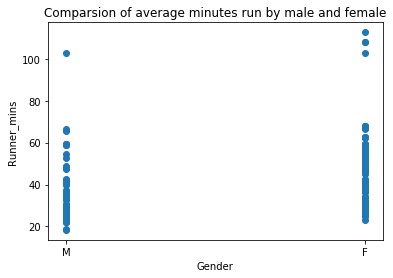

In [40]:
plt.scatter(df2['Gender'], df2['Runner_mins'])
plt.xlabel('Gender')
plt.ylabel('Runner_mins')
plt.title("Comparsion of average minutes run by male and female") 

In [41]:
df2.describe(include=[np.number])

,Year,ChipTime_minutes,Runner_mins
count,175.0,175.000000,175.000000
mean,2017.0,2099.971429,41.666667
std,0.0,935.987372,17.388009
min,2017.0,62.000000,18.333333
25%,2017.0,1563.000000,27.766667
50%,2017.0,2017.000000,37.766667
75%,2017.0,2872.000000,52.425000
max,2017.0,3572.000000,112.700000


Text(0, 0.5, 'Run time')

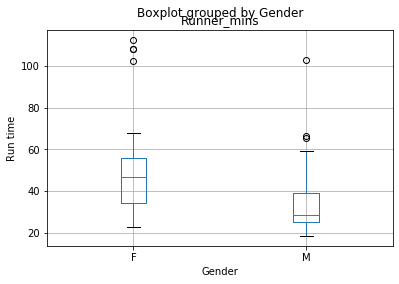

In [42]:
df2.boxplot(column='Runner_mins', by = 'Gender')
plt.ylabel('Run time')

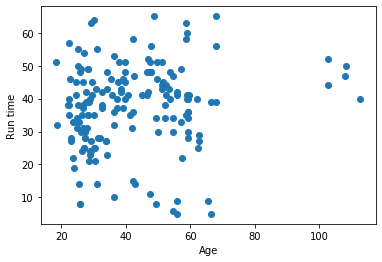

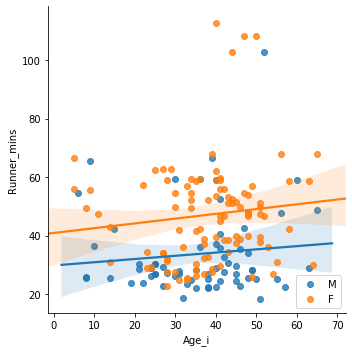

In [43]:
import seaborn as sns, numpy as np
df2['Age_i'] = round(pd.to_numeric(df2['Age'], errors='coerce'))
df2.dropna(how ='any', inplace = True)
df = plt.scatter(df2['Runner_mins'], df2['Age_i'])
df = plt.ylabel('Run time')
df= plt.xlabel('Age')
df = plt.show()

sns.lmplot( x='Age_i', y='Runner_mins', data=df2, fit_reg=True, hue='Gender', legend=False)
plt.legend(loc='lower right')


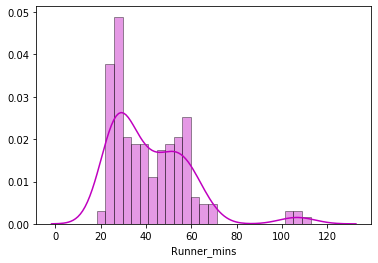

In [44]:
import seaborn as sns, numpy as np
x = df2['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

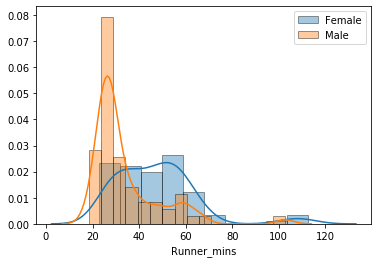

In [45]:
f_fuko = df2.loc[df2['Gender']=='F']['Runner_mins']
m_fuko = df2.loc[df2['Gender']=='M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [47]:
g_stats = df2.groupby("Gender", as_index=True).describe()
print(g_stats)

         Year                                                       \
        count    mean  std     min     25%     50%     75%     max   
Gender                                                               
F       101.0  2017.0  0.0  2017.0  2017.0  2017.0  2017.0  2017.0   
M        67.0  2017.0  0.0  2017.0  2017.0  2017.0  2017.0  2017.0   

       ChipTime_minutes               ... Runner_mins         Age_i  \
                  count         mean  ...         75%    max  count   
Gender                                ...                             
F                 101.0  2271.891089  ...   55.783333  112.7  101.0   
M                  67.0  1818.462687  ...   36.283333  102.7   67.0   

                                                           
             mean        std  min   25%   50%   75%   max  
Gender                                                     
F       38.198020  12.228671  5.0  31.0  40.0  46.0  65.0  
M       36.014925  13.791184  6.0  26.0  38.0  45.5  

Text(0, 0.5, 'Run time')

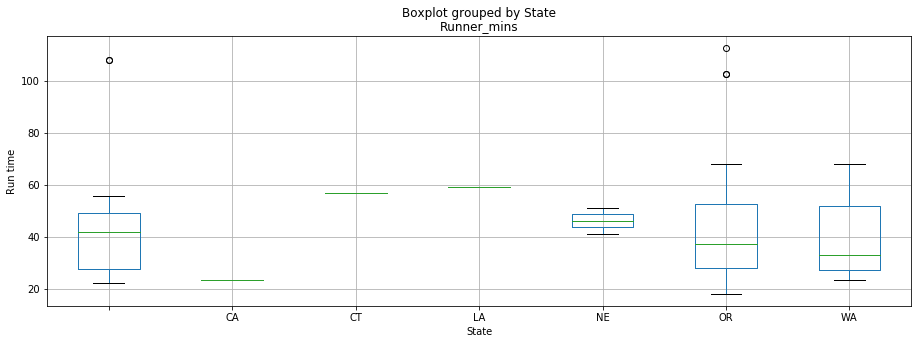

In [48]:
df2.boxplot(column='Runner_mins', by = 'State')
plt.ylabel('Run time')

Text(0, 0.5, 'Run time')

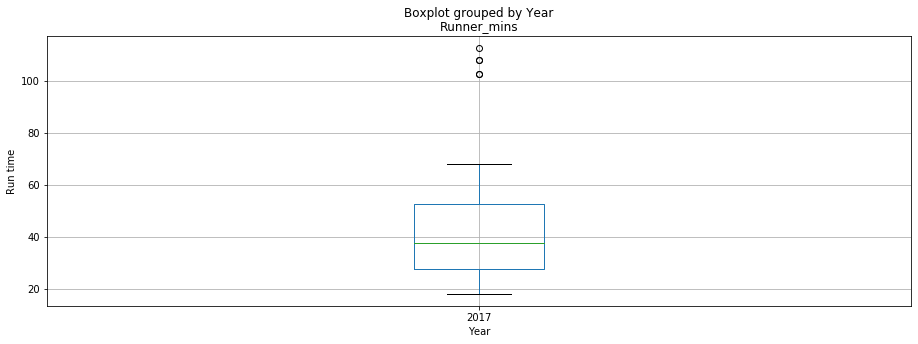

In [49]:
df2.boxplot(column='Runner_mins', by = 'Year')
plt.ylabel('Run time')

In [50]:
df2.to_csv('final2017.csv')